<a href="https://colab.research.google.com/github/navanil018/Kaggle/blob/master/Mith_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#2. Based on the domain knowledge I think Age, Chestpainloc,painexertion,chestpaintype,IsSmoker,NumCigs,SmokingPeriod,thalassemia,rcaaprox and rcadistance will be responsible.

import pandas as pd
import numpy

from sklearn import preprocessing, metrics#, cross_validation
#from sklearn.cross_validation import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.cluster import KMeans

In [5]:
#Load the Drive helper and mount
from google.colab import drive
from sklearn.model_selection import train_test_split

#This will prompt for authorization.
#drive.mount('/content/drive')

!ls "/content/drive"
loc = "/content/drive/My Drive/Kaggle/Heart_Disease_Severity/Train.csv"
loc_test = "/content/drive/My Drive/Kaggle/Heart_Disease_Severity/Test.csv"

train_data = pd.read_csv(loc)
train_data.head()

test_data = pd.read_csv(loc_test)
test_data.head()

'My Drive'


,id,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,...,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,nameOfPatient,Location
0,4043,71,0,1,1,1,2,160,302,1,...,1,1,1,-9,1,1,1,1,name,Cleveland
1,4159,60,1,1,1,1,4,140,293,-9,...,1,2,1,1,1,1,2,1,name,Cleveland
2,5065,53,1,1,1,0,2,120,0,1,...,2,2,1,2,2,1,2,2,name,Switzerland
3,2003,37,1,1,0,0,2,130,283,1,...,1,1,1,1,-9,1,1,1,name,Hungarian
4,3027,51,1,1,1,1,4,-9,0,1,...,1,1,2,1,1,1,2,1,name,Va


In [6]:
(train_data.shape), (test_data.shape)

((674, 55), (223, 54))

In [7]:
#Different classes in Outcome variable
train_data["Severity"].value_counts()

None          228
Moderate      147
MildClass1    136
MildClass2    118
Severe         45
Name: Severity, dtype: int64

In [8]:
for col_name in train_data.columns:
    if train_data[col_name].dtypes ==  'object' or 'bool' :
       unique_cat = len(train_data[col_name].unique())
       print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'id' has 674 unique categories
Feature 'age' has 49 unique categories
Feature 'gender' has 2 unique categories
Feature 'chestpainloc' has 3 unique categories
Feature 'painexertion' has 3 unique categories
Feature 'reliefbyrest' has 3 unique categories
Feature 'chestpaintype' has 4 unique categories
Feature 'restingBP' has 59 unique categories
Feature 'serumcholesterol' has 200 unique categories
Feature 'IsSmoker' has 3 unique categories
Feature 'NumCigs' has 24 unique categories
Feature 'SmokingPeriod' has 39 unique categories
Feature 'FastingBS' has 3 unique categories
Feature 'FamHistory' has 3 unique categories
Feature 'restingECGRes' has 4 unique categories
Feature 'ECGspecsDigitalis' has 3 unique categories
Feature 'ECGspecsBetaBlocker' has 3 unique categories
Feature 'ECGspecsNitrates' has 3 unique categories
Feature 'ECGspecsCalci' has 3 unique categories
Feature 'ECGspecsdiuretic' has 3 unique categories
Feature 'ExTestDuration' has 76 unique categories
Feature 'TimeSTN

In [0]:
### Drop the ID column from both Train and Test Data.

train_data.drop(['id','Location','nameOfPatient'],axis=1, inplace=True)
test_data.drop(['id', 'Location','nameOfPatient'],axis=1, inplace=True)

In [10]:
print(len(train_data.columns))
print(len(test_data.columns))

52
51


In [0]:
categorical_list = ["gender","chestpainloc","painexertion","reliefbyrest","chestpaintype","IsSmoker","FastingBS","FamHistory","restingECGRes",
                    "ECGspecsDigitalis","ECGspecsBetaBlocker","ECGspecsNitrates","ECGspecsCalci","ECGspecsdiuretic","ExInducedAngina","xhypo",
                    "Slope","restwallmotion","ExerWallmotion","thalassemia","LeftMaintrunk","ladproximation","laddistance","cxmain",
                    "ramus","obtuseMarginal1","obtuseMarginal2","rcaproximation","rcadistance"]

In [0]:
categorical_list_t = ["gender","chestpainloc","painexertion","reliefbyrest","chestpaintype","IsSmoker","FastingBS","FamHistory","restingECGRes",
                    "ECGspecsDigitalis","ECGspecsBetaBlocker","ECGspecsNitrates","ECGspecsCalci","ECGspecsdiuretic","ExInducedAngina","xhypo",
                    "Slope","restwallmotion","ExerWallmotion","thalassemia","LeftMaintrunk","ladproximation","laddistance","cxmain",
                    "ramus","obtuseMarginal1","obtuseMarginal2","rcaproximation","rcadistance"]

In [13]:
print(categorical_list)
print(len(categorical_list))

['gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'IsSmoker', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExInducedAngina', 'xhypo', 'Slope', 'restwallmotion', 'ExerWallmotion', 'thalassemia', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance']
29


In [14]:
print(categorical_list_t)
print(len(categorical_list_t))

['gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'IsSmoker', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExInducedAngina', 'xhypo', 'Slope', 'restwallmotion', 'ExerWallmotion', 'thalassemia', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance']
29


In [0]:
#Identifying categorical attributes in train data
for i in train_data[categorical_list]:
    train_data[i] = train_data[i].astype("category") 

In [0]:
#Identifying categorical attributes in test data
for i in test_data[categorical_list_t]:
    test_data[i] = test_data[i].astype("category") 

In [17]:
#Creating a list of numerical attributes
numeric_list = train_data.select_dtypes(exclude=['category']).columns
print(len(numeric_list))

23


In [18]:
print(numeric_list)

Index(['age', 'restingBP', 'serumcholesterol', 'NumCigs', 'SmokingPeriod',
       'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen',
       'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'Stdepression',
       'HeightatRest', 'heightatPeakEx', 'NumMajVessels', 'restRaidonuclid',
       'exerRadinalid', 'thalsev', 'thalpul', 'earlobe', 'Severity'],
      dtype='object')


In [19]:
### Number of rows with Atleast one missing value is 598 out of 674 rows.
### So we cannot drop these rows and hence will have to impute them.
sum(train_data.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

598

In [20]:
### Check the null values in Train Dataset

#print(train_data.isnull().sum())
print(test_data.isnull().sum())

age                    0
gender                 0
chestpainloc           0
painexertion           0
reliefbyrest           0
chestpaintype          0
restingBP              0
serumcholesterol       0
IsSmoker               0
NumCigs                0
SmokingPeriod          0
FastingBS              0
FamHistory             0
restingECGRes          0
ECGspecsDigitalis      0
ECGspecsBetaBlocker    0
ECGspecsNitrates       0
ECGspecsCalci          0
ECGspecsdiuretic       0
ExTestDuration         0
TimeSTNoted            0
Metabolism             0
MaxHR                  0
RestHRGen              0
PeakExBP1              0
PeakExBP2              0
restingBPGen           0
ExInducedAngina        0
xhypo                  0
Stdepression           0
Slope                  0
HeightatRest           0
heightatPeakEx         0
NumMajVessels          0
restRaidonuclid        0
restwallmotion         0
exerRadinalid          0
ExerWallmotion         0
thalassemia            0
thalsev                0


In [0]:
#Imputation of Numerical attributes in train data

#When you have more columns use the following code
for column in  ['age', 'restingBP', 'serumcholesterol', 'NumCigs', 'SmokingPeriod',
       'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen',
       'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'Stdepression',
       'HeightatRest', 'heightatPeakEx', 'NumMajVessels', 'restRaidonuclid',
       'exerRadinalid', 'thalsev', 'thalpul', 'earlobe']:
    train_data[column].fillna(train_data[column].mean(), inplace=True)
#If you want to replace with median use median() instead of mean()
#If you want to replace with mode use mode()[0]

In [0]:
#Imputation of categorical attributes in train data

for column in ['gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'IsSmoker', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExInducedAngina', 'xhypo', 'Slope', 'restwallmotion', 'ExerWallmotion', 'thalassemia', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance']:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)



In [23]:
print(train_data.isnull().sum().sum())

0


In [24]:
#print(test_data.isnan())
print(test_data.isnull().sum().sum())

0


In [0]:
#IMputation of Numerical attributes in test data

#When you have more columns use the following code
for column in  ['age', 'restingBP', 'serumcholesterol', 'NumCigs', 'SmokingPeriod',
       'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen',
       'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'Stdepression',
       'HeightatRest', 'heightatPeakEx', 'NumMajVessels', 'restRaidonuclid',
       'exerRadinalid', 'thalsev', 'thalpul', 'earlobe']:
    test_data[column].fillna(test_data[column].mean(), inplace=True)
#If you want to replace with median use median() instead of mean()
#If you want to replace with mode use mode()[0]

In [0]:
#Imputation of categorical attributes in train data

for column in ['gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'IsSmoker', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExInducedAngina', 'xhypo', 'Slope', 'restwallmotion', 'ExerWallmotion', 'thalassemia', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance']:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

In [27]:
print(test_data.isnull().sum().sum())

0


In [0]:
#train_data.dtypes['chestpainloc']

In [29]:
train_data.head(5)

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,...,LeftMaintrunk,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Severity
0,37,1,1.0,0.0,0.0,3,118.0,240.0,0.0,18.567939,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,None
1,41,0,1.0,1.0,1.0,2,126.0,306.0,1.0,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,None
2,54,1,0.0,0.0,0.0,1,120.0,171.0,1.0,19.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Moderate
3,44,1,1.0,0.0,0.0,2,130.0,215.0,1.0,19.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,None
4,58,1,1.0,0.0,0.0,2,130.0,251.0,1.0,19.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,MildClass2


In [0]:
corr_num_attr = train_data.select_dtypes(include=['float64','float']).columns
#print(corr_num_attr)

In [0]:
corr=train_data[corr_num_attr].corr()

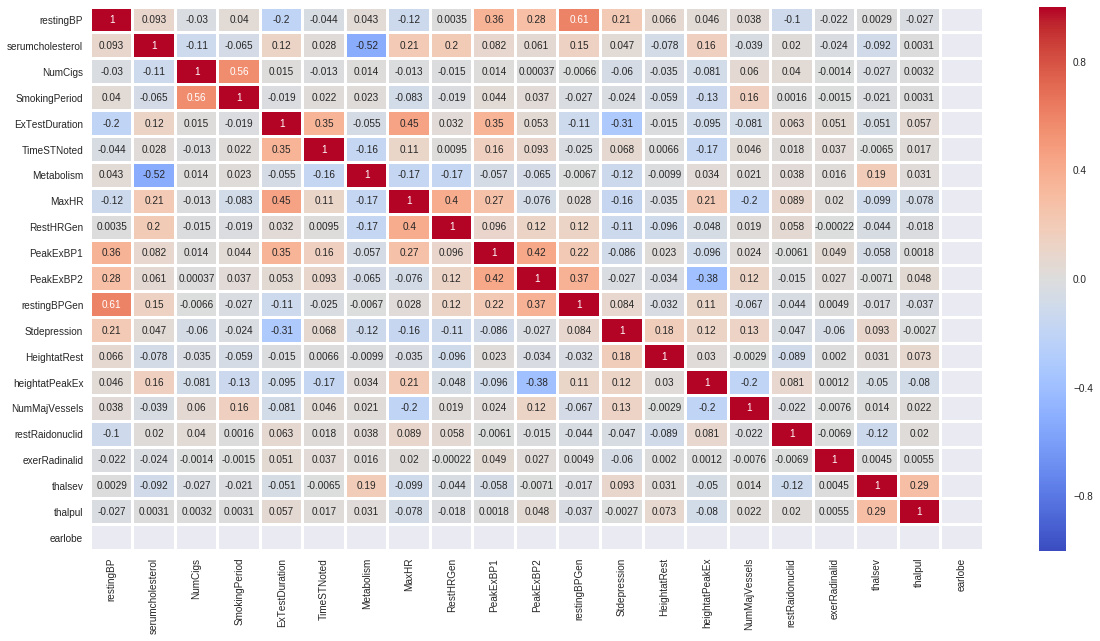

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr,cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [0]:
le1 = preprocessing.LabelEncoder()
for i in categorical_list:
    le1.fit(train_data[i])
    train_data[i] = le1.fit_transform(train_data[i])

In [0]:
le2 = preprocessing.LabelEncoder()
for i in categorical_list_t:
    le2.fit(test_data[i])
    test_data[i] = le2.fit_transform(test_data[i])

In [36]:
print(test_data.shape)

(223, 51)


In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=12)


In [38]:
# Divide train data into train and evaluation data
y=train_data["Severity"]
X=train_data.drop('Severity', axis=1)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.10)
print(X_train.shape)
print(X_eval.shape)
print(y_train.shape)
print(y_eval.shape)

(606, 51)
(68, 51)
(606,)
(68,)


In [39]:

%time clf.fit(X_train, y_train)

CPU times: user 6.82 ms, sys: 3.78 ms, total: 10.6 ms
Wall time: 12.5 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y1_pred_ = clf.predict(X_train)
print(accuracy_score(y_train,y1_pred_))

0.9257425742574258


In [41]:
y_pred_ = clf.predict(X_eval)
print(accuracy_score(y_eval,y_pred_))

0.8235294117647058


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [0]:
dt = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt, param_grid, cv=10)

In [45]:
%time clf.fit(X_train, y_train)

CPU times: user 24.2 s, sys: 0 ns, total: 24.2 s
Wall time: 24.2 s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [None, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
y1_pred_ = clf.predict(X_train)

In [47]:
print(accuracy_score(y_train,y1_pred_))
print("\n")

0.8267326732673267




In [48]:
y_pred_ = clf.predict(X_eval)
print(accuracy_score(y_eval,y_pred_))

0.8235294117647058


In [49]:
y_pred_test=clf.predict(test_data) 
print(len(y_pred_test))

223


In [50]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_eval)

accuracy = svm_model_linear.score(X_eval, y_eval)
print(accuracy)

0.6470588235294118
